### Necessary Imports

In [362]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from dataset import *

### Reading Data from CSV File

In [363]:
df = pd.read_csv( "../ML-Project-CS361/cleaned_shifted_data.csv" ) # Reading data from .csv file
drop_cols = [0,1,2,12,14,16]                                       # Making a list of index of columns of the dataframe that are not needed
drop_cols = df.columns[drop_cols]                                  # Making drop_cols the list of columns to be dropped from dataframe
df.drop(columns=drop_cols, inplace=True)                           # Dropping the columns from drop_cols list in df dataframe
df

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AQI_calculated,AQI_calculated_shifted
0,46.00,80.00,1.29,9.16,12.02,27.19,13.56,0.40,15.80,67.0,296.0
1,46.00,80.00,1.74,8.93,12.48,30.29,13.71,0.41,15.52,68.0,297.0
2,45.62,79.92,1.87,8.56,12.17,28.20,13.88,0.41,15.33,68.0,298.0
3,41.00,72.92,1.83,8.72,12.37,26.69,13.77,0.40,15.30,68.0,298.0
4,41.00,79.00,1.69,7.91,11.30,26.83,13.87,0.41,15.49,68.0,299.0
...,...,...,...,...,...,...,...,...,...,...,...
174757,72.00,116.00,6.40,3.30,6.90,4.90,44.20,0.63,68.00,252.0,219.0
174758,71.00,114.00,6.40,3.40,7.00,4.90,41.30,0.68,69.10,249.0,219.0
174759,71.00,114.00,6.30,3.50,7.00,4.90,42.20,0.73,66.90,247.0,219.0
174760,73.00,114.00,6.30,5.00,7.80,5.50,0.40,0.76,44.60,238.0,220.0


### Assigning columns to Feature Variable X and Target Variable Y

In [364]:
X = df.drop(columns=[ 'AQI_calculated_shifted'])             # Assigning columns to the X 
X

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AQI_calculated
0,46.00,80.00,1.29,9.16,12.02,27.19,13.56,0.40,15.80,67.0
1,46.00,80.00,1.74,8.93,12.48,30.29,13.71,0.41,15.52,68.0
2,45.62,79.92,1.87,8.56,12.17,28.20,13.88,0.41,15.33,68.0
3,41.00,72.92,1.83,8.72,12.37,26.69,13.77,0.40,15.30,68.0
4,41.00,79.00,1.69,7.91,11.30,26.83,13.87,0.41,15.49,68.0
...,...,...,...,...,...,...,...,...,...,...
174757,72.00,116.00,6.40,3.30,6.90,4.90,44.20,0.63,68.00,252.0
174758,71.00,114.00,6.40,3.40,7.00,4.90,41.30,0.68,69.10,249.0
174759,71.00,114.00,6.30,3.50,7.00,4.90,42.20,0.73,66.90,247.0
174760,73.00,114.00,6.30,5.00,7.80,5.50,0.40,0.76,44.60,238.0


In [365]:
Y=df['AQI_calculated_shifted']                              # Asssigning Y to target i.e. AQI_calculated_shifted
Y

0         296.0
1         297.0
2         298.0
3         298.0
4         299.0
          ...  
174757    219.0
174758    219.0
174759    219.0
174760    220.0
174761    220.0
Name: AQI_calculated_shifted, Length: 174762, dtype: float64

In [366]:
Y.shape                  # checking shape of Y

(174762,)

#### Splitting the Dataset into training and testing data

In [367]:
#Splitting the dataset into 
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size =0.3,  random_state = 0 )        

In [368]:
#converting the dataframes to array to use them in function 
X_train_np=X_train.to_numpy()
Y_train_np=Y_train.to_numpy()


In [369]:
X_train_np.shape,Y_train_np.shape

((122333, 10), (122333,))

### Using the sklearn LinearRegression Model to predict the AQI

In [370]:
from sklearn.linear_model import LinearRegression              # Importing LinearRegression from sklearn
lr=LinearRegression().fit(X_train_np, Y_train_np)              # Fitting our training data to train our model
Y_pred_train = lr.predict(X_train_np)                          # Predicting the output
Y_pred_train

array([102.75298379, 204.66194705, 194.33357145, ...,  77.26173936,
       137.19331854,  80.3738818 ])

In [371]:
#Making a new dataframe with a new column with predicted values by the sklearn linear model
predictions_df_train = pd.DataFrame({
                               
                               'PM2.5 (µg/m³)': X_train['PM2.5 (µg/m³)'],
                               'PM10 (µg/m³)': X_train['PM10 (µg/m³)'],
                               'NO (µg/m³)': X_train['NO (µg/m³)'],
                               'NO2 (µg/m³)': X_train['NO2 (µg/m³)'],
                               'NOx (ppb)': X_train['NOx (ppb)'],
                               'NH3 (µg/m³)': X_train['NH3 (µg/m³)'],
                               'SO2 (µg/m³)': X_train['SO2 (µg/m³)'],
                               'CO (mg/m³)': X_train['CO (mg/m³)'],
                               'AQI_calculated': X_train['AQI_calculated'],
                               'AQI_calculated_shifted': Y_train,
    'Sklearn AQI Predictions':Y_pred_train
                               })
predictions_df_train

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),AQI_calculated,AQI_calculated_shifted,Sklearn AQI Predictions
49172,24.00,163.00,0.21,10.27,5.10,2.41,19.96,0.46,122.0,192.0,102.752984
50053,89.00,195.00,54.00,17.77,48.98,6.73,21.68,1.97,193.0,156.0,204.661947
139770,31.00,80.00,2.07,3.55,5.72,7.36,18.96,0.58,261.0,324.0,194.333571
149023,229.40,304.10,28.67,9.59,35.64,21.23,5.61,0.71,267.0,332.0,260.784247
5361,59.00,83.00,56.97,16.26,111.13,10.64,17.77,0.66,93.0,79.0,127.521466
...,...,...,...,...,...,...,...,...,...,...,...
95939,21.00,72.00,5.21,2.67,5.16,4.76,11.08,0.23,177.0,134.0,154.503920
152315,35.00,206.30,0.25,2.22,1.69,20.78,4.67,0.17,89.0,306.0,85.504183
117952,12.00,30.86,1.24,2.08,3.47,3.56,28.23,0.37,47.0,73.0,77.261739
173685,9.00,26.00,6.50,3.80,7.30,5.10,7.70,2.34,115.0,116.0,137.193319


### Creating the Linear_Regression class to implement linear regression

In [372]:

from numpy.linalg import inv

class Linear_Regression:
    def __init__(self):
        pass
# Generally: y[i] = alpha + (beta_1 * x_1[i]) + (beta_2 * x_2[i]) + (beta_3 * x_3[i]) + error
# Model:     y_hat[i] = alpha_hat + (beta_1_hat * x_1[i]) + (beta_2_hat * x_2[i]) + (beta_3_hat * x_3[i])

    def predict(self, model, X):
        '''
        Obtain the predictions for the given model and inputs.

        model: np.array of Floats with shape (p,) of parameters
        X: np.array of Floats with shape (n, p-1) of inputs

        Returns: np.array of Floats with shape (n,).
        '''
        (n, p_minus_one) = X.shape
        p = p_minus_one + 1

        new_X = np.ones(shape=(n, p))
        new_X[:, 1:] = X

        return np.dot(new_X, model)
    
    def fit(self, X, y):
        '''
        Returns the model with the parameters that minimize the MSE.

        X: np.array of Floats with shape (n, p-1) of inputs
        y: np.array of Floats with shape (n,) of observed outputs

        Returns: np.array of shape (p,) representing the model.
        '''
        (n, p_minus_one) = X.shape
        p = p_minus_one + 1

        new_X = np.ones(shape=(n, p))
        new_X[:, 1:] = X

        return np.dot(np.dot(inv(np.dot(new_X.T, new_X)), new_X.T), y)


In [373]:
linear_regression = Linear_Regression()          # creating an instance of linear_regression class

In [374]:
model = linear_regression.fit(X_train_np, Y_train_np)                                      # Training our model with the training data
predictions_df_train['Our Predictions'] = linear_regression.predict(model, X_train_np)     # Making a new columns in predictions_df_train with our predicted target  
predictions_df_train

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),AQI_calculated,AQI_calculated_shifted,Sklearn AQI Predictions,Our Predictions
49172,24.00,163.00,0.21,10.27,5.10,2.41,19.96,0.46,122.0,192.0,102.752984,102.752984
50053,89.00,195.00,54.00,17.77,48.98,6.73,21.68,1.97,193.0,156.0,204.661947,204.661947
139770,31.00,80.00,2.07,3.55,5.72,7.36,18.96,0.58,261.0,324.0,194.333571,194.333571
149023,229.40,304.10,28.67,9.59,35.64,21.23,5.61,0.71,267.0,332.0,260.784247,260.784247
5361,59.00,83.00,56.97,16.26,111.13,10.64,17.77,0.66,93.0,79.0,127.521466,127.521466
...,...,...,...,...,...,...,...,...,...,...,...,...
95939,21.00,72.00,5.21,2.67,5.16,4.76,11.08,0.23,177.0,134.0,154.503920,154.503920
152315,35.00,206.30,0.25,2.22,1.69,20.78,4.67,0.17,89.0,306.0,85.504183,85.504183
117952,12.00,30.86,1.24,2.08,3.47,3.56,28.23,0.37,47.0,73.0,77.261739,77.261739
173685,9.00,26.00,6.50,3.80,7.30,5.10,7.70,2.34,115.0,116.0,137.193319,137.193319


### Running our model on testing data 

In [375]:
# Convert the test dataframes to arrays
X_test_np=X_test.to_numpy()                  
Y_test_np=Y_test.to_numpy()

In [376]:
X_test_np, Y_test_np

(array([[2.3311e+02, 4.2811e+02, 8.2720e+01, ..., 3.6800e+00, 1.1550e+01,
         3.2100e+02],
        [8.2000e+01, 1.1300e+02, 1.1560e+01, ..., 8.2000e-01, 1.0980e+01,
         1.2100e+02],
        [1.1500e+02, 2.6062e+02, 5.4900e+00, ..., 1.0300e+00, 2.0950e+01,
         2.0300e+02],
        ...,
        [2.8000e+01, 5.6000e+01, 5.3800e+00, ..., 3.0000e-01, 1.1527e+02,
         1.5000e+02],
        [2.1000e+01, 2.7000e+01, 5.4000e+00, ..., 3.1000e-01, 1.4250e+01,
         4.0000e+01],
        [3.2000e+01, 5.9000e+01, 1.0100e+00, ..., 4.9000e-01, 1.8310e+01,
         7.6000e+01]]),
 array([325., 149., 301., ..., 227., 132.,  32.]))

#### Using sklearn Model

In [377]:
Y_pred_test = lr.predict(X_test_np)                       # Predicting the AQI from testing data using sklearn model
Y_pred_test

array([321.43326475, 140.23162998, 176.36219896, ..., 129.01828045,
        90.33363794, 102.47923116])

In [378]:
predictions_df_test = pd.DataFrame({
                               
                               'PM2.5 (µg/m³)': X_test['PM2.5 (µg/m³)'],
                               'PM10 (µg/m³)': X_test['PM10 (µg/m³)'],
                               'NO (µg/m³)': X_test['NO (µg/m³)'],
                               'NO2 (µg/m³)': X_test['NO2 (µg/m³)'],
                               'NOx (ppb)': X_test['NOx (ppb)'],
                               'NH3 (µg/m³)': X_test['NH3 (µg/m³)'],
                               'SO2 (µg/m³)': X_test['SO2 (µg/m³)'],
                               'CO (mg/m³)': X_test['CO (mg/m³)'],
                               'AQI_calculated': X_test['AQI_calculated'],
                               'AQI_calculated_shifted': Y_test,
    'Sklearn AQI Predictions':Y_pred_test
                               })
predictions_df_test

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),AQI_calculated,AQI_calculated_shifted,Sklearn AQI Predictions
51427,233.11,428.11,82.72,14.19,68.66,4.17,23.71,3.68,321.0,325.0,321.433265
83982,82.00,113.00,11.56,2.93,17.70,11.87,19.27,0.82,121.0,149.0,140.231630
88698,115.00,260.62,5.49,2.57,5.34,11.81,10.26,1.03,203.0,301.0,176.362199
51363,123.00,221.00,14.03,14.72,17.64,5.03,22.09,1.51,324.0,326.0,254.633935
102949,81.00,121.00,5.30,2.85,5.36,6.17,12.50,1.35,107.0,180.0,135.991256
...,...,...,...,...,...,...,...,...,...,...,...
135147,18.57,62.43,5.38,1.91,5.03,4.79,9.23,0.29,127.0,47.0,119.794005
140757,31.00,83.00,1.41,0.67,2.46,9.38,20.52,0.46,181.0,267.0,149.858419
95688,28.00,56.00,5.38,2.62,5.30,5.44,12.12,0.30,150.0,227.0,129.018280
136279,21.00,27.00,5.40,2.31,5.23,4.60,8.65,0.31,40.0,132.0,90.333638


#### Using our own Linear_Regression model 

In [379]:
predictions_df_test['Our Predictions'] = linear_regression.predict(model, X_test_np)   # Making a new dataframe with a column with our test data prediction
predictions_df_test                                                                    

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),AQI_calculated,AQI_calculated_shifted,Sklearn AQI Predictions,Our Predictions
51427,233.11,428.11,82.72,14.19,68.66,4.17,23.71,3.68,321.0,325.0,321.433265,321.433265
83982,82.00,113.00,11.56,2.93,17.70,11.87,19.27,0.82,121.0,149.0,140.231630,140.231630
88698,115.00,260.62,5.49,2.57,5.34,11.81,10.26,1.03,203.0,301.0,176.362199,176.362199
51363,123.00,221.00,14.03,14.72,17.64,5.03,22.09,1.51,324.0,326.0,254.633935,254.633935
102949,81.00,121.00,5.30,2.85,5.36,6.17,12.50,1.35,107.0,180.0,135.991256,135.991256
...,...,...,...,...,...,...,...,...,...,...,...,...
135147,18.57,62.43,5.38,1.91,5.03,4.79,9.23,0.29,127.0,47.0,119.794005,119.794005
140757,31.00,83.00,1.41,0.67,2.46,9.38,20.52,0.46,181.0,267.0,149.858419,149.858419
95688,28.00,56.00,5.38,2.62,5.30,5.44,12.12,0.30,150.0,227.0,129.018280,129.018280
136279,21.00,27.00,5.40,2.31,5.23,4.60,8.65,0.31,40.0,132.0,90.333638,90.333638


### Error Analysis and Comparing the Two models

#### Mean Squared Error for Our Model

In [380]:
mean_squared_error(Y_test,predictions_df_test['Our Predictions'])

6661.498418894129

#### Mean Squared Error for sklearn linear model

In [381]:
mean_squared_error(Y_test,predictions_df_test['Sklearn AQI Predictions'])

6661.498418894129

#### Scatter to show relationship between the two models

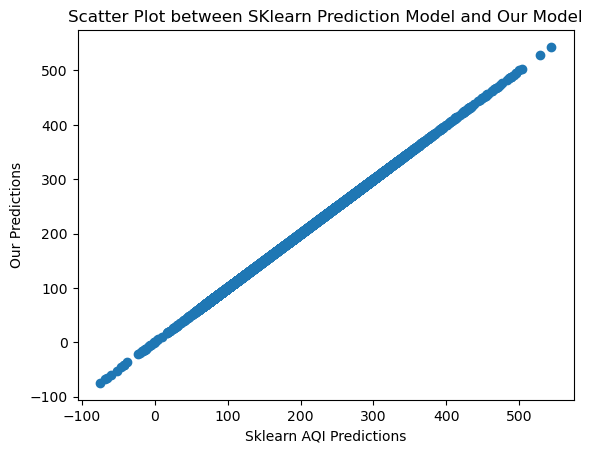

In [384]:
plt.scatter(predictions_df_test['Sklearn AQI Predictions'], predictions_df_test['Our Predictions'])
plt.xlabel('Sklearn AQI Predictions')
plt.ylabel('Our Predictions')
plt.title('Scatter Plot between SKlearn Prediction Model and Our Model')
plt.show()

### Getting the downside square error for the model

 This is done because for our model we are predicting AQI even if the prediction is wrong but the predicted AQI is higher it won't be a problem but if AQI is predicted smaller than actual then this will be a problem since we won't be alert about the pollution in the air.

In [386]:
from error_define import *
# realigning the indices of the two dataframe since due to spli
aligned_pred = predictions_df_test['Sklearn AQI Predictions'].reset_index(drop=True)
aligned_test = Y_test.reset_index(drop=True)
downside_square_error(aligned_pred,aligned_test)

4242.004048554985